<h1> Comparison between mean and median filter in filtering noise </h1>

Example 3.4

In [21]:
# import python packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt2d
from scipy.ndimage import convolve
from skimage.data import camera
import random

<p>We define a function to add salt-and-pepper noise to the input image.</p>
Salt-and-pepper noise means that a random number of black and white pixels is added to the image.

In [17]:
def add_salt_and_pepper(image):
    row, col = image.shape

    # Random numer of white pixels
    number_of_pixels = random.randint(300, 1000)
    for i in range(number_of_pixels):
        # Choose random coordinates
        y_coord = random.randint(0, row - 1)
        x_coord = random.randint(0, col - 1)
        # Color that pixel white
        image[y_coord, x_coord] = 255

    # Random number of black pixels
    number_of_pixels = random.randint(300, 1000)
    for i in range(number_of_pixels):
        # Choose random coordinates
        y_coord = random.randint(0, row - 1)
        x_coord = random.randint(0, col - 1)
        # Color that pixel black
        image[y_coord, x_coord] = 0

    return image

Definition of the mean filter as in Def. 3.1

In [18]:
def mean_filter_kernel(n):
    kernel = (1/(n**2)) * np.ones((n, n))
    return kernel

Add noise to the image and apply the filters.

In [19]:
image = camera()
image_sp = add_salt_and_pepper(image)
median = medfilt2d(image_sp, kernel_size=3)
mean = convolve(image_sp, mean_filter_kernel(3))

Plotinng of the results

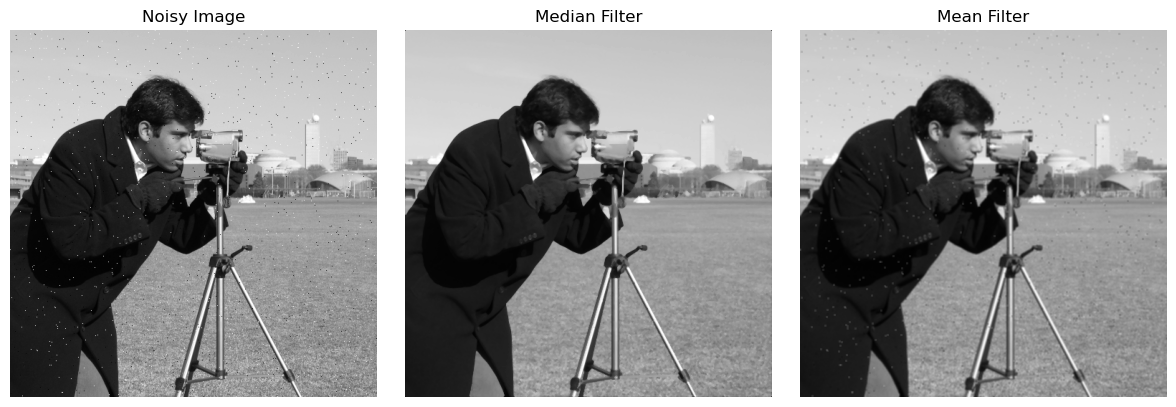

In [20]:
fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True,
                         figsize=(12, 4))

axes[0].imshow(image_sp, cmap=plt.cm.gray)
axes[0].set_title('Noisy Image')

axes[1].imshow(median, cmap=plt.cm.gray)
axes[1].set_title('Median Filter')

axes[2].imshow(mean, cmap=plt.cm.gray)
axes[2].set_title('Mean Filter')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.savefig('median_vs_mean', bbox_inches='tight')
plt.show()